<div style="padding:20px; 
            color:#f5f5f5;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color:#e3bf09;
            background-color:#e3bf09;
            font-family:newtimeroman;
            overflow:hidden;
            font-weight:500">Applicability of Markov Chains in Weather Forecasting</div>

<center>
<img src="https://github.com/DorobantuDiana/DS_Projects/blob/main/objects/weather_pendulum.gif?raw=true" width=300>
</center>

---
<br>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#9ADCFF;font-family:newtimeroman;color:#f5f5f5;font-size:160%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
    
1.  [Scope & Methods ](#1)
    
2.  [Libraries & Data Loading](#2)
    
3.  [State Space](#3)
   
4.  [Transition Matrix](#4)
    
5.  [Transition Graph](#5)
    
6.  [Ergodicity](#6)
    
7.  [Limiting Distribution](#7) 
    
8.  [Limiting Matrix](#8) 
 
9.  [Trajectory Simulation](#9)

10. [Average Turnaround Time](#10)
    
  
<br>
    
---

<a id="1"></a>
<p style="background-color:#9ADCFF;font-family:newtimeroman;color:#f5f5f5;font-size:150%;text-align:center;border-radius:10px 10px;">Scope & Methods</p>

Since the advent of powerful computers, numerical models have been used to better understand weather dynamics.

The <i>two main objectives</i> sought to be achieved with these models are <u><i>improved weather predictions</i></u> and a <u><i>better understanding of Earth's climatic system sensitivity to anthropogenic influences</i></u>. Currently, global models, together with data from satellite observations and ground-based measurements, are used to drive local models. 

One of the methods used for weather forecasting is called the <i>analog method</i>. It involves examining the <u>past state</u> (which is the same as our current state) and predicting the weather based on what happened in the past. Therefore, the Markov model can be used to apply analog forecasting methods for weather prediction.

In probability theory, a <b><i>Markov model is a <u>stochastic</u> model used to model randomly changing systems</i></b>. It is assumed that <b><i><u>future states depend only on the current state</u></i></b>, not on the events that occurred before it.

In the context of this project, we will make observations about the <b>weather in Seoul</b>, the capital of South Korea. Thus, we have data regarding the type of weather during the period <b>December 31, 2019</b> to <b>April 20, 2020</b>. 

In general, the climate of Korea is characterized by the seasonal alternation of <b>continental influence</b>: <u>cold and dry</u> in <b>winter</b>, and <b>monsoon influence</b>: <u>humid and warm</u> in <b>summer</b>. 

In Seoul, the average temperature in <b>January</b> varies between <b>-7°C</b> and <b>1°C</b>, while the average temperature in <b>July</b> ranges from <b>22°C</b> to <b>29°C</b>.

The amount of precipitation is concentrated during the summer months, from June to September. The southern coast is the place where late typhoons occur, with strong winds and abundant precipitation. The average annual precipitation ranges from 1,370mm/m2 in Seoul to 1,470mm/m2 in Busan (with peaks of around 1,500 on Jeju Island).

Winter begins in December and lasts until mid-March. In the northern region, where Seoul is located, winters are harsh with temperatures almost always below 0°C. However, snowfall is relatively rare and not abundant. The main reason for the extreme winters in Korea is the Siberian wind. In the southern part of South Korea, winters are mild (Busan with an average temperature of 5°C).

</br>

<center>
<img src="https://github.com/DorobantuDiana/DS_Projects/blob/main/Environment/Proiect%20P&MS/Monthly%20average%20temperatures%20and%20weather.%20Monthly%20precipitation%20and%20snowfall%20in%20Seoul%202015%20-%202021.png?raw=true" width=600>
</center>

</br>

</br>


The Korea Institute of Atmospheric Prediction Systems (<b>KIAPS</b>) initiated a national project in 2011 for developing a new <i>global atmospheric model system</i>. The ultimate goal of this 9-year project is to replace the current operational model at the Korea Meteorological Administration (<b>KMA</b>), which was adopted from the Unified Model (<b>UM</b>) of the UK Met Office in 2010. 

The <b>Korean Integrated Model</b> (<b>KIM</b>) has been implemented within a real-time forecast framework with an advanced physics parameterization package. The new generation of the global KIM model was <u>launched operationally in April 2020</u>.

<a id="2"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#9ADCFF;font-family:newtimeroman;color:#f5f5f5;font-size:150%;text-align:center;border-radius:10px 10px;">Libraries & Data Loading</p>  

In [1]:
pacman :: p_load(pacman,stats, dplyr, knitr, ggplot2, plotly, psych, gridExtra,
                 waffle, emojifont,tidyr, tidytext, wordcloud, GGally, viridis,
                tidyverse, rnaturalearth, rnaturalearthdata) 

options(warn=-1) # warnings will be suppressed and will not be displayed in the console or any output

In [2]:
# Read data
df <- read.table("/kaggle/input/sm-and-p-project/weather_seoul.csv", header = F)

# Nr. of instances
cat("Number of instances:", nrow(df))

# View data
head(df, 10)

Number of instances: 112

,V1
,<chr>
1,clear-day
2,clear-day
3,clear-day
4,partly-cloudy-day
5,clear-day
6,rain
7,rain
8,rain
9,partly-cloudy-day


<a id="3"></a>
<p style="background-color:#9ADCFF;font-family:newtimeroman;color:#f5f5f5;font-size:150%;text-align:center;border-radius:10px 10px;">State Space</p>

In [3]:
# Identify what the state space S 
weather_states <- unique(df)
weather_states

# Identify the number of states
nr_states <- nrow(weather_states)
nr_states

,V1
,<chr>
1,clear-day
4,partly-cloudy-day
6,rain
16,cloudy
48,snow
79,wind


[1] 6

<div style="border-radius: 40px;
            color: #403b34;
            background-color: #FCF9BE;
            font-size: 100%;
            text-align: left;
            padding: 20px;
            margin: 10px;
            box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <p style="margin-bottom: 10px; font-weight: bold;">Output Analysis:</p>
    <ul style="margin-top: 0;">
        <li>
We can conclude that the state space is: <b>
            S = {clear-day, partly-cloudy-day, rain, cloudy, snow, wind}</b> </li>
        </ul>
</div>

<a id="4"></a>
<p style="background-color:#9ADCFF;font-family:newtimeroman;color:#f5f5f5;font-size:150%;text-align:center;border-radius:10px 10px;">Transition Matrix</p>

In [4]:
# Transition matrix P (probabilities are calculated in EXCEL)

P <- matrix(c(0.564102564, 0.153846154, 0.076923077, 0.179487179, 0,           0.025641026,
              0.303030303, 0.575757576, 0.030303030, 0.090909091, 0,           0,
              0,           0.285714286, 0.428571429, 0.285714286, 0,           0,
              0.137931034, 0.206896552, 0,           0.586206897, 0.034482759, 0.034482759,
              1,           0,           0,           0,           0,           0,
              0.5,         0,           0,           0,           0,           0.5),
            nrow = 6,
            byrow = TRUE)
# P

# We are checking that the sum per lines is 1:
# rowSums(P)

# We define a vector that contains the states of the Markov chain:
states <- c("clear", "partly-cloudy", "rain", "cloudy", "snow", "wind")
# states

# Adaugam etichete liniilor si coloanelor matricei P:
rownames(P) <- states
colnames(P) <- states
P


,clear,partly-cloudy,rain,cloudy,snow,wind
clear,0.5641026,0.1538462,0.07692308,0.17948718,0.00000000,0.02564103
partly-cloudy,0.3030303,0.5757576,0.03030303,0.09090909,0.00000000,0.00000000
rain,0.0000000,0.2857143,0.42857143,0.28571429,0.00000000,0.00000000
cloudy,0.1379310,0.2068966,0.00000000,0.58620690,0.03448276,0.03448276
snow,1.0000000,0.0000000,0.00000000,0.00000000,0.00000000,0.00000000
wind,0.5000000,0.0000000,0.00000000,0.00000000,0.00000000,0.50000000


<a id="5"></a>
<p style="background-color:#9ADCFF;font-family:newtimeroman;color:#f5f5f5;font-size:150%;text-align:center;border-radius:10px 10px;">Transition Graph</p>

Any Markov chain can be described by a <u>directed graph</u> called the <b>transition graph of the Markov chain</b>, where the nodes/vertices represent the <i>states</i> of the chain and the <i>transition probabilities</i> between pairs of states are marked next to the arcs/edges.

<center>
<img src="https://raw.githubusercontent.com/DorobantuDiana/DS_Projects/main/Environment/Proiect%20P%26MS/graful%20de%20tranzi%C8%9Bie.png" width=600>
</center>

The finite space of states of a Markov chain can be partitioned into transient and recurrent states:

<h2 style='; border:0; border-radius: 10px; font-weight: bold; color:#2b2924'><center> 
    </br> <i>S = T ∪ R1 ∪ R2 ∪ ... ∪ Rm</i>
</center></h2>  

where:

* T is the set of all transient states
* R1, R2, Rm are closed communication classes that contain recurrent states
* S = T ∪ R1 ∪ R2 ∪ ... ∪ Rm is called the canonical decomposition of S

Considering that, in our case, the Markov chain is <b>irreducible</b>, meaning we have <b>only one (recurrent) class</b>, the space of states cannot be written in any other form. <b>For a finite irreducible Markov chain, all states are recurrent</b>.

For a Markov chain with transition matrix P, the period of state i ∈ S, denoted as d(i), is the greatest common divisor (GCD) of all numbers that represent the possible number of steps to return to state i:

<h2 style='; border:0; border-radius: 10px; font-weight: bold; color:#2b2924'><center> 
    </br> <i>d(i) = GCD {n > 0: (p<sub>ii</sub><sup>n</sup> > 0} </i>
</center></h2> 


States within a communication class all have the same period.

d("clear") = d(1) = GCD {1, 2, 3, ...} = 1 => the state "clear" is aperiodic

1 – 1 => 1 step

1 – 2 – 1 => 2 steps

1 – 2 – 2 – 1 => 3 steps

...

We can state that <b>all states in the state space are aperiodic</b>.

Thus, the Markov chain is aperiodic since it is irreducible, and all states have a period equal to 1.

<a id="6"></a>
<p style="background-color:#9ADCFF;font-family:newtimeroman;color:#f5f5f5;font-size:150%;text-align:center;border-radius:10px 10px;">Ergodicity</p>

A Markov chain is called ergodic if it is irreducible, aperiodic and all states have a finite mean recurrence time.

In [5]:
matrixpower <- function(matrix,k) {
  if (k == 0) return (diag(dim(matrix)[1]))
  if (k == 1) return(matrix)
  if (k > 1) return( matrix %*% matrixpower(matrix, k-1))
}

# We are checking if matrix P is regular, so if there exists a natural number s such that P^s > 0:

if (all(matrixpower(P, 10) > 0)) {
  print("All components of the matrix are positive, therefore we can state that P is a regular matrix => ERGODIC CHAIN")
} else {
  print("There are non-positive components in the matrix.")
}

[1] "All components of the matrix are positive, therefore we can state that P is a regular matrix => ERGODIC CHAIN"


<a id="7"></a>
<p style="background-color:#9ADCFF;font-family:newtimeroman;color:#f5f5f5;font-size:150%;text-align:center;border-radius:10px 10px;">Limiting Distribution</p>

If the Markov chain is ergodic, then there exists a stationary distribution that is also the unique limiting distribution of the chain.

<b>The limiting distribution does not depend on the initial state of the chain.</b>

In [6]:
# Stationary Distribution
stationary <- function(mat) {
  x = eigen(t(mat))$vectors[,1]
  as.double(x/sum(x))
}
stationary_distribution<- stationary(P)
# stationary_distribution

# Limiting Distribution
limiting_distribution <- stationary_distribution
limiting_distribution

[1] 0.345132743 0.292035398 0.061946903 0.256637168 0.008849558 0.035398230


<div style="border-radius: 40px;
            color: #403b34;
            background-color: #FCF9BE;
            font-size: 100%;
            text-align: left;
            padding: 20px;
            margin: 10px;
            box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <p style="margin-bottom: 10px; font-weight: bold;">Output Analysis:</p>
     
Long-term:

* The probability of the weather being in the <i><b>clear</b></i> state (regardless of the starting state) is 0.3451 => <b>34.51%</b>;

* The probability of the weather being in the <i><b>partly-cloudy</b></i> state (regardless of the starting state) is 0.2920 => <b>29.20%</b>;

* The probability of the weather being in the <i><b>rain</b></i> state (regardless of the starting state) is 0.0619 => <b>6.19%</b>;

* The probability of the weather being in the <i><b>cloudy</b></i> state (regardless of the starting state) is 0.2566 => <b>25.66%</b>;

* The probability of the weather being in the <i><b>snow</b></i> state (regardless of the starting state) is 0.0088 => <b>0.88%</b>;

* The probability of the weather being in the <i><b>wind</b></i> state (regardless of the starting state) is 0.0354 => <b>3.54%</b>.
        
    
</div>



<a id="8"></a>
<p style="background-color:#9ADCFF;font-family:newtimeroman;color:#f5f5f5;font-size:150%;text-align:center;border-radius:10px 10px;">Limiting Matrix</p>

In [7]:
# Function to determine the smallest power m of a transition matrix of a Markov chain,
# with the property that P^m = P^(m+1)

power_func <- function(matrix){
  for(m in 1:1000){
    mat1 <- round(matrixpower(matrix, m), digits = 9)
    mat2 <- round(matrixpower(matrix, m + 1), digits = 9)
    if(all.equal(mat1, mat2, tolerance = 0) == TRUE){
      return(m)
      break
    }
  }
}

power <- power_func(P)
power

[1] 37

In [8]:
# The Limiting Matrix is:
P_lim <- matrixpower(P, 37)
P_lim

,clear,partly-cloudy,rain,cloudy,snow,wind
clear,0.3451327,0.2920354,0.0619469,0.2566372,0.008849558,0.03539823
partly-cloudy,0.3451327,0.2920354,0.0619469,0.2566372,0.008849558,0.03539823
rain,0.3451327,0.2920354,0.0619469,0.2566372,0.008849558,0.03539823
cloudy,0.3451327,0.2920354,0.0619469,0.2566372,0.008849558,0.03539823
snow,0.3451327,0.2920354,0.0619469,0.2566372,0.008849558,0.03539823
wind,0.3451327,0.2920354,0.0619469,0.2566372,0.008849558,0.03539823


<a id="9"></a>
<p style="background-color:#9ADCFF;font-family:newtimeroman;color:#f5f5f5;font-size:150%;text-align:center;border-radius:10px 10px;">Trajectory Simulation</p>

I proposed an initial <b>equal distribution</b> {1/6, 1/6, 1/6, 1/6, 1/6, 1/6} and then simulated a trajectory of the chain for a number of <b>100 steps</b>.

In [9]:
# The sample function is a function used to perform or obtain a selection with or without replacement of a specified volume, 
# resulting in values or realizations of a random variable with a given or known probability distribution

set.seed(123454)
simulation_results <- sample(x = c("clear", "partly-cloudy", "rain", "cloudy", "snow", "wind"),
                             size = 100,
                             replace = TRUE,
                             prob = c(1/6, 1/6, 1/6, 1/6,1/6, 1/6))
simulation_results

# Absolute frequency distribution
abs_freq_distrib <- table(simulation_results)
abs_freq_distrib

# Relative frequency distribution
rel_freq_distrib <- table(simulation_results)/length(simulation_results)
rel_freq_distrib 

[1] "partly-cloudy" "partly-cloudy" "cloudy"        "wind"         
  [5] "snow"          "cloudy"        "snow"          "rain"         
  [9] "partly-cloudy" "clear"         "cloudy"        "partly-cloudy"
 [13] "partly-cloudy" "rain"          "rain"          "rain"         
 [17] "wind"          "wind"          "snow"          "wind"         
 [21] "partly-cloudy" "clear"         "partly-cloudy" "partly-cloudy"
 [25] "snow"          "partly-cloudy" "snow"          "snow"         
 [29] "clear"         "clear"         "rain"          "wind"         
 [33] "cloudy"        "clear"         "clear"         "cloudy"       
 [37] "cloudy"        "rain"          "rain"          "wind"         
 [41] "wind"          "clear"         "wind"          "rain"         
 [45] "partly-cloudy" "snow"          "snow"          "snow"         
 [49] "snow"          "cloudy"        "partly-cloudy" "partly-cloudy"
 [53] "partly-cloudy" "wind"          "snow"          "wind"         
 [57] "wind"          "clear"         "clear"         "clear"        
 [61] "partly-cloudy" "wind"          "clear"         "rain"         
 [65] "cloudy"        "snow"          "clear"         "wind"         
 [69] "clear"         "partly-cloudy" "partly-cloudy" "partly-cloudy"
 [73] "partly-cloudy" "clear"         "cloudy"        "clear"        
 [77] "clear"         "cloudy"        "partly-cloudy" "rain"         
 [81] "rain"          "partly-cloudy" "rain"          "rain"         
 [85] "rain"          "snow"          "snow"          "rain"         
 [89] "cloudy"        "rain"          "wind"          "rain"         
 [93] "cloudy"        "snow"          "partly-cloudy" "cloudy"       
 [97] "snow"          "partly-cloudy" "partly-cloudy" "snow"

simulation_results
        clear        cloudy partly-cloudy          rain          snow 
           16            13            23            17            17 
         wind 
           14 

simulation_results
        clear        cloudy partly-cloudy          rain          snow 
         0.16          0.13          0.23          0.17          0.17 
         wind 
         0.14 

<div style="border-radius: 40px;
            color: #403b34;
            background-color: #FCF9BE;
            font-size: 100%;
            text-align: left;
            padding: 20px;
            margin: 10px;
            box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <p style="margin-bottom: 10px; font-weight: bold;">Output Analysis:</p>
We observe that the relative frequencies differ greatly from the result of the stationary distribution. Therefore, we can increase the number of replications to observe that, with a very large number of them, the distribution of relative frequencies tends towards the stationary distribution. 
</div>

Using the Markov and replicate functions, we replicate 10 000 trajectories.

In [10]:

# We introduce the vector with the initial probability distribution::
initial <- c(1/6, 1/6, 1/6, 1/6, 1/6, 1/6) 
initial

# We assign the initial probability vector the labels of the states:
names(initial) <- states
initial

markov <- function(init, matrix, n, labels) {
  if (missing(labels)) labels <- 1:length(init)
  # construct a vector named simlist with n+1 elements, initialized with all elements as 0
  # the function numeric(integer) creates a vector of length (integer) with all elements as 0
  simlist <- numeric(n+1) 
  # the states are labeled as 1, 2, ..., k, where k is the number of states in the chain
  # the states of the chain are the labels
  states <- 1:length(init) 
  # the first element of the simlist vector is a realization or simulation of a single state
  # from the distribution X0 = the initial distribution of the chain
  simlist[1] <- sample(states,
                       1,
                       replace = TRUE,
                       prob = init)
  # the other elements of the simlist vector: simlist[2], ..., simlist[n+1]
  # represent each a realization or simulation
  # from the probability distribution given by the simlist[i-1] row of the matrix P
  for (i in 2:(n+1)) 
  { simlist[i] <- sample(states,
                       1,
                       replace = TRUE,
                       prob = matrix[simlist[i-1],]) }
  # attach the states corresponding to the elements of the simlist vector:
  labels[simlist] 
}

# replicate() is a function used to repeat a certain action a specified number of times

# replicate the previously defined Markov function 10000 times:
replicate_sim <- replicate(10000,
                       markov(initial, P, 100, states))
head(replicate_sim,30)

# sreplicated_sim represents the simulation of 10000 Markov chains which represents the trajectories
# of 10000 paths, from the initial moment 0, up to 100 days ahead;
# the trajectories are found in each of the 100 columns

# Absolute frequency distribution
distr_abs_freq_2 <- table(replicate_sim)
distr_abs_freq_2

# Relative frequency distribution:
rel_freq_distrib_2 <- table(replicate_sim)/length(replicate_sim)
rel_freq_distrib_2


[1] 0.1666667 0.1666667 0.1666667 0.1666667 0.1666667 0.1666667

clear partly-cloudy          rain        cloudy          snow 
    0.1666667     0.1666667     0.1666667     0.1666667     0.1666667 
         wind 
    0.1666667

rain,wind,wind,wind,rain,partly-cloudy,cloudy,partly-cloudy,rain,wind,⋯,wind,partly-cloudy,clear,clear,clear,clear,clear,clear,clear,snow
rain,wind,wind,wind,rain,partly-cloudy,partly-cloudy,partly-cloudy,rain,wind,⋯,wind,partly-cloudy,partly-cloudy,cloudy,clear,clear,cloudy,clear,clear,clear
rain,wind,clear,clear,partly-cloudy,clear,partly-cloudy,clear,partly-cloudy,clear,⋯,wind,partly-cloudy,partly-cloudy,wind,clear,clear,cloudy,cloudy,rain,clear
partly-cloudy,wind,clear,cloudy,clear,partly-cloudy,clear,clear,partly-cloudy,clear,⋯,clear,partly-cloudy,partly-cloudy,wind,cloudy,clear,cloudy,partly-cloudy,rain,partly-cloudy
partly-cloudy,wind,clear,cloudy,clear,cloudy,partly-cloudy,cloudy,partly-cloudy,clear,⋯,clear,cloudy,partly-cloudy,wind,cloudy,clear,wind,clear,cloudy,partly-cloudy
partly-cloudy,clear,rain,cloudy,wind,cloudy,clear,partly-cloudy,partly-cloudy,partly-cloudy,⋯,clear,cloudy,partly-cloudy,clear,cloudy,clear,wind,cloudy,wind,partly-cloudy
clear,clear,cloudy,cloudy,clear,partly-cloudy,cloudy,cloudy,clear,partly-cloudy,⋯,clear,cloudy,partly-cloudy,clear,partly-cloudy,clear,wind,cloudy,clear,partly-cloudy
clear,cloudy,cloudy,partly-cloudy,rain,partly-cloudy,partly-cloudy,cloudy,clear,partly-cloudy,⋯,cloudy,partly-cloudy,clear,wind,partly-cloudy,rain,clear,clear,partly-cloudy,partly-cloudy
clear,cloudy,partly-cloudy,partly-cloudy,cloudy,partly-cloudy,partly-cloudy,clear,partly-cloudy,clear,⋯,cloudy,partly-cloudy,clear,clear,cloudy,partly-cloudy,clear,clear,partly-cloudy,clear
clear,cloudy,clear,partly-cloudy,cloudy,partly-cloudy,clear,wind,cloudy,cloudy,⋯,cloudy,partly-cloudy,clear,clear,partly-cloudy,clear,clear,clear,clear,clear
rain,clear,partly-cloudy,clear,cloudy,partly-cloudy,rain,wind,clear,cloudy,⋯,cloudy,clear,wind,clear,clear,clear,rain,cloudy,cloudy,clear


replicate_sim
        clear        cloudy partly-cloudy          rain          snow 
       348220        257610        291553         64380         10477 
         wind 
        37760 

replicate_sim
        clear        cloudy partly-cloudy          rain          snow 
   0.34477228    0.25505941    0.28866634    0.06374257    0.01037327 
         wind 
   0.03738614 

<div style="border-radius: 40px;
            color: #403b34;
            background-color: #FCF9BE;
            font-size: 100%;
            text-align: left;
            padding: 20px;
            margin: 10px;
            box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <p style="margin-bottom: 10px; font-weight: bold;">Output Analysis:</p>
We note that the results are very similar, and of course, with an even greater number of steps, they will tend to be perfectly equal.
</div>


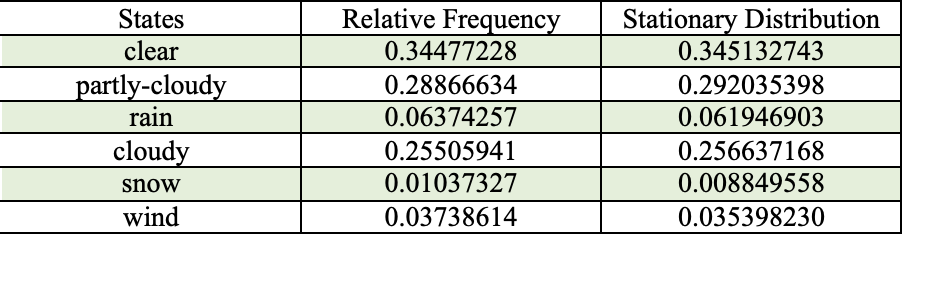

<a id="10"></a>
<p style="background-color:#9ADCFF;font-family:newtimeroman;color:#f5f5f5;font-size:150%;text-align:center;border-radius:10px 10px;">Average Turnaround Time</p>

For our irreducible Markov chain, we will calculate the average return time to the state from which it started, which is the average number of transitions or steps in which the chain revisits a certain state.

For these calculations, use the formula: 

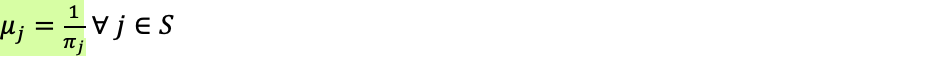 

where:
* μj is the average return time in state j

* π is the unique stationary distribution

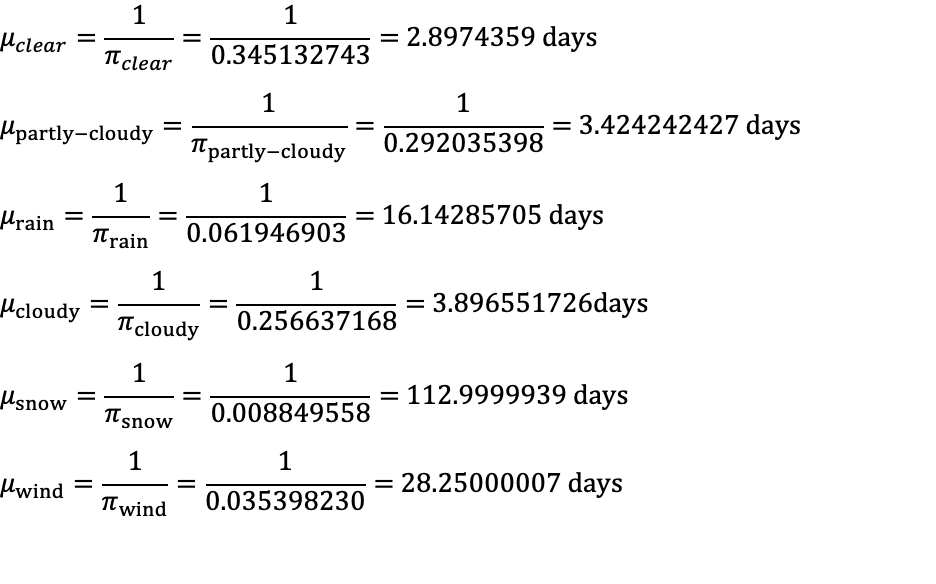